In [75]:
import os
import tensorflow as tf

In [76]:
gpus = tf.config.experimental.list_physical_devices ('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth (gpu, True)

In [181]:
dataset_path = 'dataset'

for class_name in os.listdir (dataset_path):
    if class_name.startswith ('.'):
        continue
    else:
        for image_name in os.listdir (os.path.join (f'{dataset_path}', f'{class_name}')):
            if image_name.startswith ('.'):
                continue
            else:
                image_path = os.path.join (f'{dataset_path}', f'{class_name}', f'{image_name}')
                with Image.open (image_path) as img:
                    img = img.convert ('RGBA')
                    img.save (image_path)

UnidentifiedImageError: cannot identify image file 'dataset/spam/01c72a77$9399e640$d9785451@MEU_coltsfoo9245000.jpg'

In [182]:
dataset = tf.keras.utils.image_dataset_from_directory (
    './dataset/',
    image_size=(299, 299)
)

Found 5171 files belonging to 2 classes.


In [183]:
dataset = dataset.map (lambda x, y: (x / 255, y))

In [184]:
batch = dataset.as_numpy_iterator ().next ()

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext] name: 

Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


In [185]:
import matplotlib.pyplot as plt

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 2 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


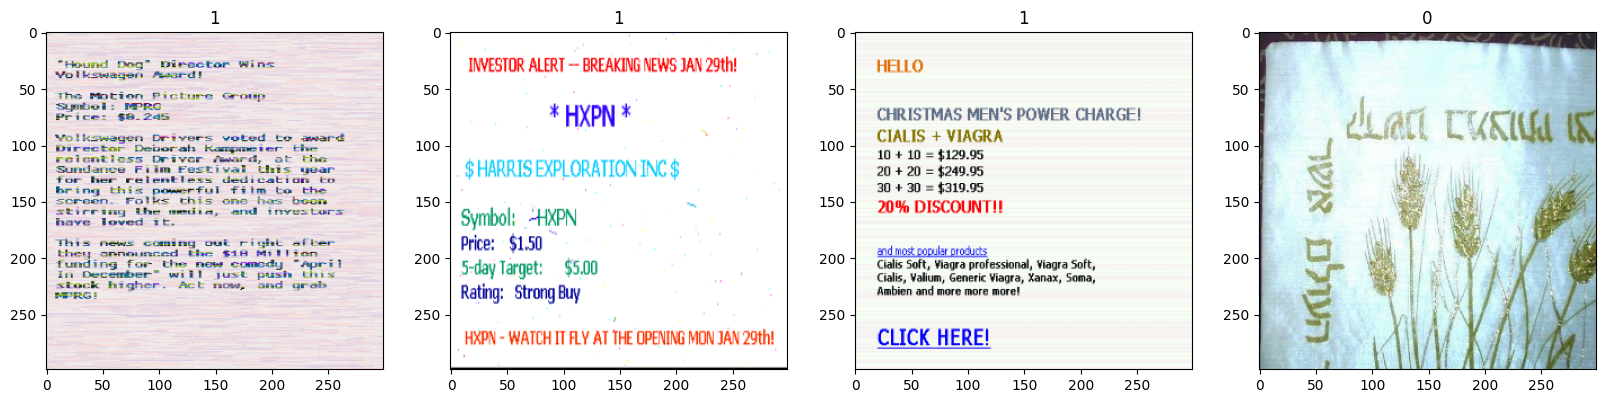

In [186]:
fig, ax = plt.subplots (ncols=4, figsize=(20, 20))
for idx, image in enumerate (batch[0][:4]):
    ax[idx].imshow (image)
    ax[idx].title.set_text (batch[1][idx])

In [187]:
batch[0].min (), batch[0].max ()

(0.0, 1.0)

In [188]:
len (dataset)

162

In [189]:
train_size = int (len (dataset) * 0.7)
val_size = int (len (dataset) * 0.2) + 1
test_size = int (len (dataset) * 0.1)

In [190]:
train_size, val_size, test_size
train_size + val_size + test_size

162

In [191]:
train = dataset.take (train_size)
test = dataset.skip (train_size).take (test_size)
val = dataset.skip (train_size + test_size).take (val_size)

In [192]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [193]:
model = Sequential ([
    Conv2D (32, 3, padding='same', activation='relu', input_shape=(299, 299, 3)),
    MaxPooling2D (),
    Conv2D (64, 3, padding='same', activation='relu'),
    MaxPooling2D (),
    Flatten (),
    Dense (128, activation='relu'),
    Dense (1)
])

In [194]:
model.compile (
    'adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [195]:
import warnings
warnings.filterwarnings ('ignore', category=UserWarning, message='Corrupt JPEG data*')

In [197]:
history = model.fit (
    train,
    epochs=10,
    validation_data=val
)

Epoch 1/10


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
2023-11-04 22:57:08.016353: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3564098249781159105
2023-11-04 22:57:08.016376: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 1988316847054392595
2023-11-04 22:57:08.016424: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 12437274696223241572
Corrupt JPEG data: premature end of data segment


InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) INVALID_ARGUMENT:  Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_8]]
  (1) INVALID_ARGUMENT:  Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_18327]

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 2 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segm

In [48]:
history.history['val_accuracy']

[0.9365530014038086,
 0.9583333134651184,
 0.9034090638160706,
 0.9744318127632141,
 0.9176136255264282,
 0.9621211886405945,
 0.9554924368858337,
 0.9185606241226196,
 0.9678030014038086,
 0.9782196879386902]

In [49]:
from keras.models import load_model
model.save ('./alpha02.h5')

/Users/gsnmithra/miniforge3/envs/mlp/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
spamham = load_model ('./alpha02.h5')

In [69]:
import cv2
image = cv2.imread ('./spam.jpeg')
image = cv2.resize (image, (299, 299))

In [72]:
class_mapping = {
    0: 'ham',
    1: 'spam'
}

In [73]:
import numpy as npy
class_mapping[spamham.predict (npy.expand_dims (image, axis=0))[0][0]]

1/1 [==============================] - 0s 13ms/step


'spam'